# 泰塔尼克号存活分析

- df[['Survived']][df['Survived']>0].count()的意思
  - 首先df[['Survived']]获取该列的数据，然后[df['Survived']>0]只返回Survived列大于0的数据，.count()计算返回数据的数目
- plt.pie(x=x,labels=['1','0'],colors=['g','r'],autopct='%1.1f%%',shadow=True,explode=[0,0.05])
  - x:数据集
  - labels:数据标签
  - colors:饼状图的yans
  - autopct:饼状图上的数据
  - explode:饼状图各块的分离程度
- numpy 数组的元素定位方法，例如二维数组：array[[index],[columns]] 即行索引加列索引，a = [[1,2,3],[4,5,6],[7,8,9]],则a[[0,2],[1,0]] = [2,3]

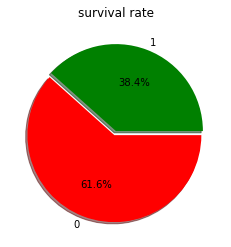

In [636]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('res/train.csv')           # 获取泰塔尼克号的数据集
x = [ int(df[['Survived']][df['Survived']>0].count()) , int(df[['Survived']][df['Survived']<1].count()) ]   # 获取[生存人数，死亡人数]列表
plt.title('survival rate')
plt.pie(x=x,labels=['1','0'],colors=['g','r'],autopct='%1.1f%%',shadow=True,explode=[0,0.05])   
plt.show()

## 处理空数
- 首先计算年龄的均值
- 然后使用年龄的均值填充年龄列的空值
- 去掉很多空值的列Cabin
- 然后去掉有空值的行（比较少，不影响总体）

In [637]:
titanic_df = df.copy()      # 获取泰塔尼克号的拷贝
# print(titanic_df.isnull().sum())
age_fillna = titanic_df['Age'].mean()   # 均值
# print(titanic_df.info())
# cabin不需要处理，没有的特征
titanic_df['Age'].fillna(age_fillna,inplace=True)   # 填充空值，inplace=True表示改变源数据
titanic_df.drop(columns=['Cabin'],inplace=True)     # 去掉Cabin列
titanic_df.dropna(inplace=True)                     #去掉空值
print(titanic_df.count())

PassengerId    889
Survived       889
Pclass         889
Name           889
Sex            889
Age            889
SibSp          889
Parch          889
Ticket         889
Fare           889
Embarked       889
dtype: int64


## 提取名字中特征,分析名称与存活率的关系
- 提取名字中的特征，发现主要组成部分为Miss Mr Mrs Master 和 其他类
- 将其他类替换成Other
- 然后将[Miss, Mr, Mrs, Master, Other] 数值化成 [0,1,2,3,4]
- 这个特征感觉没多大用处

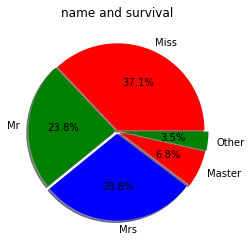

In [638]:

titanic_df['Name_num'] = titanic_df['Name'].str.extract('([A-Za-z]+)\.')            # 匹配Name特征中的称呼
# print(titanic_df.groupby(['Name_num']).sum())               # 主要部分 Miss Mr Mrs Master Other
titanic_df['Name_num'].replace(to_replace=['Capt','Col','Countess','Dr','Lady','Major','Mlle','Mme','Sir','Don','Jonkheer','Ms','Rev'],value='Other',inplace=True)    # 将其他值替换为Other
titanic_df['Name_num'].replace(to_replace=['Miss', 'Mr', 'Mrs', 'Master', 'Other'],value=[0,1,2,3,4],inplace=True)      # 将字符串数值化
x = titanic_df[['Name_num','Survived']].groupby(['Name_num']).sum()     # 存活人数中各名字存活的比例
x = np.array(x).reshape(len(x))         # 转为1D，即一维数组
plt.title('name and survival')
plt.pie(x=x,shadow=True,labels=['Miss','Mr','Mrs','Master','Other'],colors=('r','g','b')*2,autopct='%1.1f%%',explode=[0.01,0.02,0.03,0.04,0.05])
plt.show()

## 

## 分析家庭人员数量与存活关系
- 首先将SibSp和Parch相加得到某个人的家庭成员数（除他自己以外的家庭成员）
- 柱状图y轴表示存活率,x轴表示家庭成员人数

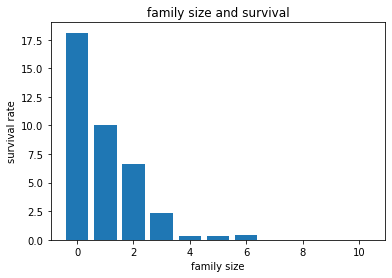

In [639]:
titanic_df['family_size']=titanic_df['SibSp']+titanic_df['Parch']                   # 获取家庭成员人数
fs_df = titanic_df[['family_size','Survived']].groupby(['family_size']).sum()/len(titanic_df)*100
y = list(fs_df['Survived'])
x = list(fs_df.index)
plt.title('family size and survival')
plt.xlabel('family size')
plt.ylabel('survival rate')
plt.bar(x=x,height=y)
plt.show()

## 分析船舱等级和存活的关系
- 首先使用船舱等级对存活进行分组统计
- y轴为存活率
- x轴为船舱等级

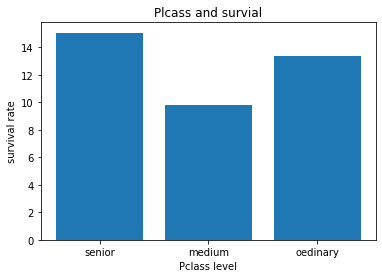

In [640]:
ps_df = titanic_df[['Survived','Pclass']].groupby(['Pclass']).sum()/len(titanic_df)*100
x = list(ps_df.index)
y = list(ps_df['Survived'])
plt.title('Plcass and survial')
plt.xlabel('Pclass level')
plt.ylabel('survival rate')
plt.bar(x,y,width=0.8,tick_label=['senior','medium','oedinary'])
plt.show()

## 分析性别和存活率的关系
- 根据性别分组分析即可
- 可得女性的存活率是男性存活率的2倍

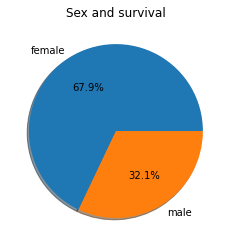

In [641]:
titanic_df['Sex'].replace(to_replace=['female','male'],value=[0,1],inplace=True)        # 数据向量化
ss_df = titanic_df[['Sex','Survived']].groupby(['Sex']).sum()/len(titanic_df)*100
x = list(ss_df['Survived'])
lables = ['female','male']
plt.title('Sex and survival')
plt.pie(x=x,autopct='%1.1f%%',shadow=True,labels=lables)
plt.show()

## 分别年龄和存活率的关系
- min-max标准化
  - 本质：把数变为【0,1】之间的小数,（X-Min）/(Max-Min)
  - 如果想要将数据映射到-1,1，则将公式换成：（X-Mean）/(Max-Min)

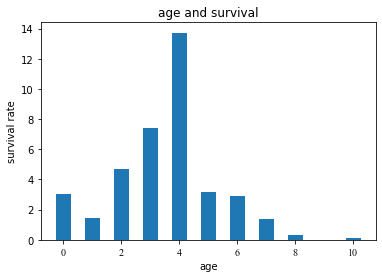

In [642]:
age_max = titanic_df['Age'].max()
age_min = titanic_df['Age'].min()
# min-max标准化（Min-Max Normalization）（线性函数归一化）
titanic_df['Age'] = round((titanic_df['Age']-age_min)/(age_max-age_min),1)                     # 数据归一化

as_df = titanic_df[['Age','Survived']].groupby(['Age']).sum()*100/len(titanic_df)   # 统计人数
as_df_list = list(np.array(as_df).reshape(len(as_df)))

plt.title('age and survival')
plt.xlabel('age')
plt.ylabel('survival rate')
# plt.figure(figsize=(14,7))   # 这条语句设置图片整体大小。
# plt.xticks(fontproperties = 'Times New Roman', size = 18)   # 设置x轴坐标大小
# plt.legend(prop = {'size':15})   # 设置图例字体大小
plt.xticks(fontproperties = 'Times New Roman', size = 10)   # 设置x轴坐标大小
plt.bar(x=list(np.arange(len(as_df_list))),width=0.5,height=as_df_list)
plt.show()

## 分析票价和存活率的关系
- 低票价的人存活率高，也可能是因为低票价的人占的比例比较多，这个看不出来

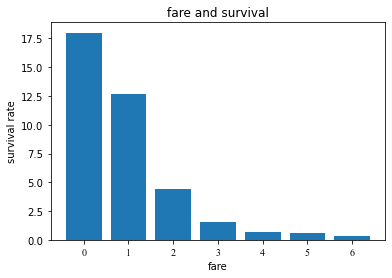

In [643]:

fare_max = titanic_df['Fare'].max()
fare_min = titanic_df['Fare'].min()
titanic_df['Fare'] = round((titanic_df['Fare']-fare_min)/(fare_max-fare_min),1)               # 票价数据聚合

fs_df = titanic_df[['Fare','Survived']].groupby(['Fare']).sum()*100/len(titanic_df)   # 统计人数
fs_df_list = list(np.array(fs_df).reshape(len(fs_df)))

plt.title('fare and survival')
plt.xlabel('fare')
plt.ylabel('survival rate')
plt.xticks(fontproperties = 'Times New Roman', size = 10)   # 设置x轴坐标大小
plt.bar(x=list(np.arange(len(fs_df_list))),width=0.8,height=fs_df_list)
plt.show()


## 去除无关数据

In [644]:
drop_columns_list = ['PassengerId','SibSp','Parch','Ticket','Embarked','Name','Name_num']      # 需要去掉的特征
titanic_df = titanic_df.drop(columns=drop_columns_list)                             # 丢弃无关的数据
titanic_df.head() 

,Survived,Pclass,Sex,Age,Fare,family_size
0,0,3,1,0.3,0.0,1
1,1,1,0,0.5,0.1,1
2,1,3,0,0.3,0.0,0
3,1,1,0,0.4,0.1,1
4,0,3,1,0.4,0.0,0


## 使用数据训练SVM的模型，然后预测

In [645]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

colmuns = list(titanic_df.columns)
colmuns.pop(0)                  # 弹出Survived元素
X = titanic_df[colmuns]         # 数据
y = list(np.array(titanic_df[['Survived']]))    # 标签
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=5)      # 划分训练集和测试集
clf = svm.SVC()
clf.fit(X=x_train,y=y_train)
predict = clf.predict(X=x_test)
metrics.accuracy_score(y_true=y_test,y_pred=predict)

f:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8764044943820225